In [75]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from matplotlib.colors import ListedColormap
cmap= ListedColormap(['#FF0000','#00FF00','#0000FF'])
from collections import Counter



In [76]:
iris=datasets.load_iris()
X,y=iris.data,iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

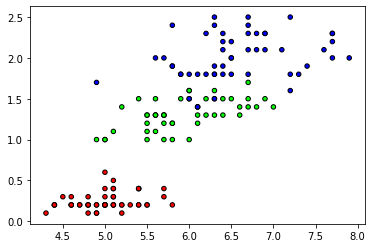

In [77]:
plt.figure()
plt.scatter(X[:,0],X[:,3],c=y,cmap=cmap,edgecolor='k',s=20)

In [90]:
def euclidian_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2))**2)
    
    
class KNN:
    
    def __init__(self,k=3):
        self.k=k
    def fit(self,x,y):
        self.X_train=x
        self.y_train=y
    def predict(self,X):
        predicted_labels=[self._predict(x) for x in X]
        return np.array(predicted_labels)
    def _predict(self,x):
        all_distances=[euclidian_distance(x,x_train) for x_train in self.X_train]
#         print(all_distances)
        k_indices=np.argsort(all_distances)[:self.k]
        
        k_nearest_neighbours=[self.y_train[i] for i in k_indices]
        
        most_common=Counter(k_nearest_neighbours).most_common(1)
        return most_common[0][0]
        

In [91]:
clf=KNN(k=3)
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)

In [87]:
acc= np.sum(predictions==y_test)/len(y_test)
print(acc)

0.9333333333333333
